# Key Findings

1️⃣ Success is geographically concentrated in hubs like California & New York.

2️⃣ Some industries perform better than others 
-----Tech & AI dominate funding, while other fields struggle.

3️⃣ Funding rounds follow a clear pattern—many startups fail to secure later rounds.

4️⃣ The way startups describe themselves matters
------—investors respond to certain key terms.

In [573]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import missingno as msno
warnings.filterwarnings("ignore")
import jupyterlab_hide_code

In [574]:
Startup_df = pd.read_csv('/Users/marianbolous/Desktop/CodeOp/Startup prediction -individual project-Project/Startups.csv')

# EDA

In [575]:
Startup_df.head()

,Company,Satus,Year Founded,Mapping Location,Description,Categories,Founders,Y Combinator Year,Y Combinator Session,Investors,Amounts raised in different funding rounds,Office Address,Headquarters (City),Headquarters (US State),Headquarters (Country),Logo,Seed-DB / Mattermark Profile,Crunchbase / Angel List Profile,Website
0,Curebit,Operating,2010.0,San Francisco - California - USA,Talkable is a social referral platform for onl...,"E-Commerce, Analytics, Internet, Marketing, So...","Allan Grant, Dominic Coryell, Jeff Yee, Nori Y...",2011,Winter,"500 Startups, Dharmesh Shah, Alex Lloyd, Auren...","$1200000, undisclosed amount","290 Division St, #405, San Francisco, Californ...",San Francisco,California,USA,http://a5.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/curebit,https://www.talkable.com
1,Goldbely,Operating,NaN,San Francisco - California - USA,Goldbely is an e-commerce site for buying and ...,"Social, E-Commerce","Joe Ariel, Joel Gillman, Trevor Stow, Vanessa ...",2013,Winter,"500 Startups, Funders Club, Dave McClure, Tim ...","$3,000,000","1 Bluxome Street, San Francisco, California, USA",San Francisco,California,USA,http://a3.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/goldbely,http://www.goldbely.com
2,theDailyMuse,Operating,2011.0,New York City - New York - USA,The Daily Muse is a job search platform offeri...,NaN,"Alex Cavoulacos, Kathryn Minshew, Melissa McCr...",2012,Winter,"500 Startups, Great Oaks Venture Capital, Grea...","$2800000, $2100000, $1200000, $1200000","33 WEST 26TH STREET, #2, New York, New York, USA",New York City,New York,USA,http://a5.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/the-dai...,http://www.thedailymuse.com
3,Zencoder,Exited,NaN,San Francisco - California - USA,Zencoder is web-based video encoding SaaS desi...,"SaaS, Cloud Computing, Audio, Web Development,...","Brandon Arbini, Jon Dahl, Steve Heffernan",2010,Winter,"500 Startups, Matt Cutts, Ignition Partners, J...","$2000000, undisclosed amount","San Francisco, CA, 94103, USA",San Francisco,California,USA,http://a1.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/zencoder,http://zencoder.com
4,GinzaMetrics,Operating,NaN,San Francisco - California - USA,GinzaMetrics offers an SEO and content marketi...,"Enterprises, E-Commerce, Analytics, SEO, Enter...",Ray Grieselhuber,2010,Summer,"500 Startups, 500 Startups, Venture51, Jeff Mi...","undisclosed amount, $1300000, $400000, $14000","25 Taylor Street, San Francisco, CA, 94103, USA",San Francisco,California,USA,http://a2.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/ginzame...,http://ginzametrics.com


In [576]:
Startup_df.tail()

,Company,Satus,Year Founded,Mapping Location,Description,Categories,Founders,Y Combinator Year,Y Combinator Session,Investors,Amounts raised in different funding rounds,Office Address,Headquarters (City),Headquarters (US State),Headquarters (Country),Logo,Seed-DB / Mattermark Profile,Crunchbase / Angel List Profile,Website
683,MailGun,Exited,2010.0,Mountain View - California - USA,Mailgun offers APIs that allow users to send r...,"Services, Email, Messaging",NaN,2011,Winter,"Yuri Milner, Paul Buchheit, SV Angel, Geoff R...","$1100000, undisclosed amount","600 N. Whisman Road, Suite 33, Mountain View, ...",Mountain View,California,USA,http://a3.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/mailgun,http://www.mailgun.net
684,Balanced Payments,Operating,2010.0,San Francisco - California - USA,Balanced is a payment system allowing marketpl...,"Peer-to-Peer, Mobile, Payments, E-Commerce","Jareau Wade, Mahmoud Abdelkader, Matin Tamizi",2011,Winter,"Yishan Wong, SV Angel, Ashton Kutcher, Brian C...","undisclosed amount, $2000000, $1400000, $150000","San Francisco, CA, 94103, USA",San Francisco,California,USA,http://a4.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/balanced,http://www.balancedpayments.com
685,Bridge,Operating,2010.0,Berkley - California - USA,NaN,Public Relations,Roger Jin,2011,Winter,"Yuri Milner, Andreessen Horowitz, Ignition Par...",undisclosed amount,"Berkeley, California, USA",Berkley,California,USA,NaN,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/bridge,http://brid.ge/
686,Clever,Operating,NaN,San Francisco - California - USA,Clever is building the platform for modern lea...,"Big Data, Data Integration, Education","Daniel Carroll, Rafael Garcia, Tyler Bosmeny",2012,Summer,"Yuri Milner, Jessica Livingston, Sam Altman, P...","$10300000, $3000000, $20000","140 2nd Street, 4th Floor, San Francisco, Cali...",San Francisco,California,USA,http://a2.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/clever,https://clever.com
687,ZeroCater,Operating,NaN,"San Francisco - California - USA, New York Cit...",ZeroCater is a catering service helping compan...,Hospitality,Arram Sabeti,2011,Winter,"Yuri Milner, Othman Laraki, Starling Ventures,...","$1,500,000","875 Sansome Street, New York City, San Francis...","San Francisco, New York City","California, New York",USA,http://a3.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/zerocater,http://ZeroCater.com


In [577]:
Startup_df.info

<bound method DataFrame.info of                Company      Satus  Year Founded  \
0              Curebit  Operating        2010.0   
1             Goldbely  Operating           NaN   
2         theDailyMuse  Operating        2011.0   
3             Zencoder     Exited           NaN   
4         GinzaMetrics  Operating           NaN   
..                 ...        ...           ...   
683            MailGun     Exited        2010.0   
684  Balanced Payments  Operating        2010.0   
685             Bridge  Operating        2010.0   
686             Clever  Operating           NaN   
687          ZeroCater  Operating           NaN   

                                      Mapping Location  \
0                     San Francisco - California - USA   
1                     San Francisco - California - USA   
2                       New York City - New York - USA   
3                     San Francisco - California - USA   
4                     San Francisco - California - USA   
..     

In [578]:
Startup_df.shape

(688, 19)

In [579]:
Startup_df.describe()

,Year Founded,Y Combinator Year
count,151.000000,688.000000
mean,2010.390728,2011.273256
std,2.576751,2.248929
min,1996.000000,2005.000000
25%,2009.000000,2010.000000
50%,2011.000000,2012.000000
75%,2012.000000,2013.000000
max,2014.000000,2014.000000


In [580]:
Startup_df.duplicated().sum()

0

In [581]:
Startup_df.value_counts

<bound method DataFrame.value_counts of                Company      Satus  Year Founded  \
0              Curebit  Operating        2010.0   
1             Goldbely  Operating           NaN   
2         theDailyMuse  Operating        2011.0   
3             Zencoder     Exited           NaN   
4         GinzaMetrics  Operating           NaN   
..                 ...        ...           ...   
683            MailGun     Exited        2010.0   
684  Balanced Payments  Operating        2010.0   
685             Bridge  Operating        2010.0   
686             Clever  Operating           NaN   
687          ZeroCater  Operating           NaN   

                                      Mapping Location  \
0                     San Francisco - California - USA   
1                     San Francisco - California - USA   
2                       New York City - New York - USA   
3                     San Francisco - California - USA   
4                     San Francisco - California - USA   

In [582]:
Startup_df.isnull().sum()

Company                                         0
Satus                                           0
Year Founded                                  537
Mapping Location                              200
Description                                    83
Categories                                    141
Founders                                      239
Y Combinator Year                               0
Y Combinator Session                            0
Investors                                       0
Amounts raised in different funding rounds    118
Office Address                                244
Headquarters (City)                           208
Headquarters (US State)                       237
Headquarters (Country)                        200
Logo                                          108
Seed-DB / Mattermark Profile                    0
Crunchbase / Angel List Profile                76
Website                                       110
dtype: int64

In [583]:
# Ensure 'Year Founded' is a number. If it's missing or not a number, mark it as NaN.
Startup_df['Year Founded'] = pd.to_numeric(Startup_df['Year Founded'], errors='coerce')

# Startup age at funding 

In [584]:
# Calculate how old the startup was when it joined Y Combinator
Startup_df['age_at_YC'] = Startup_df['Y Combinator Year'] - Startup_df['Year Founded']

In [585]:
Startup_df['age_at_YC'].head()

0    1.0
1    NaN
2    1.0
3    NaN
4    NaN
Name: age_at_YC, dtype: float64

In [586]:
Startup_df['age_at_YC'].value_counts()

age_at_YC
 0.0     64
 1.0     60
 2.0     17
-1.0      3
 5.0      2
-6.0      1
-5.0      1
 7.0      1
 3.0      1
 16.0     1
Name: count, dtype: int64

In [587]:
Startup_df['age_at_YC'].isnull().sum() 

537

In [588]:
Startup_df['age_at_YC'].describe()

count    151.000000
mean       0.768212
std        1.764251
min       -6.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       16.000000
Name: age_at_YC, dtype: float64

In [589]:
# Find rows where age_at_YC is negative
Negative_age_ = Startup_df[Startup_df['age_at_YC'] < 0]
Negative_age_df = Negative_age_.copy()

Negative_age_df


,Company,Satus,Year Founded,Mapping Location,Description,Categories,Founders,Y Combinator Year,Y Combinator Session,Investors,Amounts raised in different funding rounds,Office Address,Headquarters (City),Headquarters (US State),Headquarters (Country),Logo,Seed-DB / Mattermark Profile,Crunchbase / Angel List Profile,Website,age_at_YC
39,Tipjoy,Dead,2014.0,Arlington Heights - Massachusetts - USA,Tipjoy is a social payments engine that allows...,"Charity, Payments","Abigail Kirigin, Ivan Kirigin",2008,Winter,"betaworks, Chris Sacca, The Accelerator Group,...","$1000000, undisclosed amount","661 Mass Ave, Suite 10, Arlington Heights, Mas...",Arlington Heights,Massachusetts,USA,http://a2.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/tipjoy,http://www.tipjoy.com,-6.0
160,Vidly / Fliggo,Dead,2009.0,NaN,Vidly enables video hosting on all devices and...,"Twitter Applications, Photography","Chrys Bader-Wechseler, Daniel Rhodes, Greggory...",2008,Summer,"Ron Conway, Y Combinator","$500,000",NaN,NaN,NaN,NaN,http://a1.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/vidly,http://m.vid.ly,-1.0
325,Fuzzwich,Dead,2012.0,Palo Alto - California - USA,Fuzzwich is an online animation platform devel...,"Graphics, Consulting","Devin Hunt, Ryan Seekely",2007,Summer,Y Combinator,"$15,000","2-10 Embarcadero Rd., Palo Alto, California, USA",Palo Alto,California,USA,http://a3.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/fuzzwich,http://fuzzwich.com,-5.0
348,HireHive,Dead,2011.0,NaN,Employment/Recruitment,NaN,NaN,2010,Summer,Y Combinator,undisclosed amount,NaN,NaN,NaN,NaN,http://a5.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/hirehive,http://www.hire-hive.com/,-1.0
361,InklingMarkets,Exited,2007.0,Chicago - Illinois - USA,Inkling offers collective intelligence solutio...,Software,Adam Siegel,2006,Winter,Y Combinator,"$20000, undisclosed amount","1440 N. Kingsbury, Chicago, IL, 60626, USA",Chicago,Illinois,USA,http://a3.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/inkling,http://inklingmarkets.com,-1.0


In [590]:
Startup_df.loc[Startup_df['age_at_YC'] < 0, 'age_at_YC'] = np.nan
Negative_age_df = Startup_df[Startup_df['age_at_YC'].isnull()]
Negative_age_df

,Company,Satus,Year Founded,Mapping Location,Description,Categories,Founders,Y Combinator Year,Y Combinator Session,Investors,Amounts raised in different funding rounds,Office Address,Headquarters (City),Headquarters (US State),Headquarters (Country),Logo,Seed-DB / Mattermark Profile,Crunchbase / Angel List Profile,Website,age_at_YC
1,Goldbely,Operating,NaN,San Francisco - California - USA,Goldbely is an e-commerce site for buying and ...,"Social, E-Commerce","Joe Ariel, Joel Gillman, Trevor Stow, Vanessa ...",2013,Winter,"500 Startups, Funders Club, Dave McClure, Tim ...","$3,000,000","1 Bluxome Street, San Francisco, California, USA",San Francisco,California,USA,http://a3.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/goldbely,http://www.goldbely.com,NaN
3,Zencoder,Exited,NaN,San Francisco - California - USA,Zencoder is web-based video encoding SaaS desi...,"SaaS, Cloud Computing, Audio, Web Development,...","Brandon Arbini, Jon Dahl, Steve Heffernan",2010,Winter,"500 Startups, Matt Cutts, Ignition Partners, J...","$2000000, undisclosed amount","San Francisco, CA, 94103, USA",San Francisco,California,USA,http://a1.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/zencoder,http://zencoder.com,NaN
4,GinzaMetrics,Operating,NaN,San Francisco - California - USA,GinzaMetrics offers an SEO and content marketi...,"Enterprises, E-Commerce, Analytics, SEO, Enter...",Ray Grieselhuber,2010,Summer,"500 Startups, 500 Startups, Venture51, Jeff Mi...","undisclosed amount, $1300000, $400000, $14000","25 Taylor Street, San Francisco, CA, 94103, USA",San Francisco,California,USA,http://a2.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/ginzame...,http://ginzametrics.com,NaN
5,GazeHawk,Exited,NaN,Mountain View - California - USA,GazeHawk provides users with professional eye-...,Finance,NaN,2010,Summer,"500 Startups, Justin Yoshimura, reinmkr inc., ...",undisclosed amount,"655 W Evelyn Ave #7, Mountain View, CA, 94041,...",Mountain View,California,USA,http://a3.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/gazehawk,http://www.gazehawk.com,NaN
8,Movity,Exited,NaN,San Francisco - California - USA,Movity is a website providing location-based l...,Curated Web,"Eric Wu, Sha Hwang, Vaughn Koch",2010,Winter,"ACE & Company, Y Combinator","$1,300,000","San Francisco, CA, USA",San Francisco,California,USA,http://a2.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/movity-com,http://www.movity.com,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Vastrm,Operating,NaN,Burlingame - California - USA,Vastrm enables users to purchase custom tailor...,Fashion,Jonathan Tang,2012,Summer,"SV Angel, Columbus Nova Partners, Quest Ventu...","$1000000, undisclosed amount","2665 Martinez Drive, Burlingame, CA, 94010, USA",Burlingame,California,USA,http://a5.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/vastrm,http://www.vastrm.com,NaN
681,Noteleaf,Operating,NaN,Palo Alto - California - USA,Noteleaf designs and develops a mobile applica...,"Meeting, Software, Events, Mobile",Wil Chung,2011,Winter,"SV Angel, Start Fund, Y Combinator",undisclosed amount,"460 S California Ave, #304, Palo Alto, CA, USA",Palo Alto,California,USA,http://a4.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/noteleaf,http://noteleaf.com,NaN
682,Snipshot,Exited,NaN,Lone Butte - Canada,Snipshot is an online photo editor enabling us...,Curated Web,"Beau Hartshorne, Greg Dingle",2006,Winter,Y Combinator,

In [591]:
Negative_age_df['age_at_YC'] 

1     NaN
3     NaN
4     NaN
5     NaN
8     NaN
       ..
680   NaN
681   NaN
682   NaN
686   NaN
687   NaN
Name: age_at_YC, Length: 542, dtype: float64

# Key Observations - No strong correlation between age_at_YC and success/failure.
-Very weak negative correlation

-Most startups secured their first funding within 1-2 years after founding.

-Some startups had significant delays (up to 17 years), but they still managed to survive.

-Exited startups (those acquired or IPO'd) tend to raise funds very quickly—mostly within 0-1 years.
This suggests strong product-market fit or high investor confidence.

-Failed startups raised funding within 0-2 years, similar to operating ones.

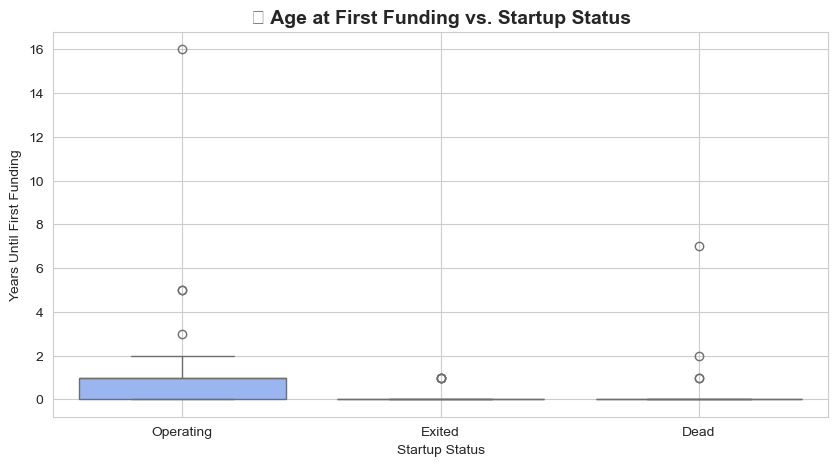

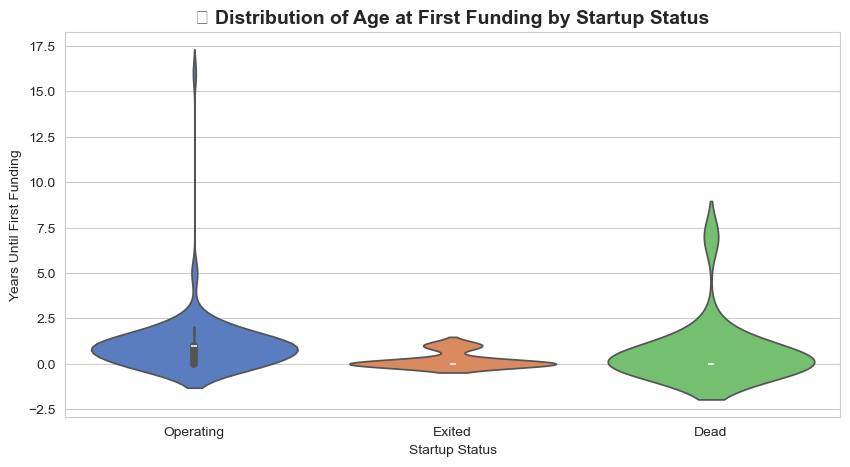

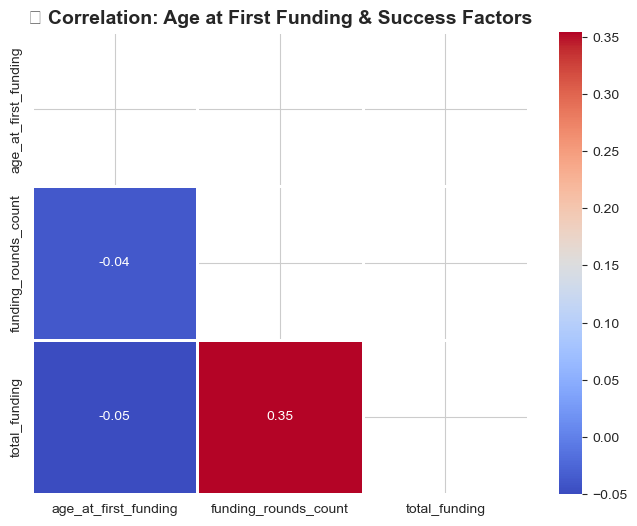

In [592]:

# Ensure 'Year Founded' is a number. If it's missing or not a number, mark it as NaN.
Startup_df['Year Founded'] = pd.to_numeric(Startup_df['Year Founded'], errors='coerce')

# Compute age at first funding
Startup_df["age_at_first_funding"] = Startup_df["Y Combinator Year"] - Startup_df["Year Founded"]

# Filter invalid values (e.g., negative ages)
Startup_df = Startup_df[Startup_df["age_at_first_funding"] >= 0]

# Ensure 'funding_rounds_count' and 'total_funding' columns exist
if 'funding_rounds_count' not in Startup_df.columns or 'total_funding' not in Startup_df.columns:
	# Function to count funding rounds and total money raised
	def count_funding_rounds(amounts):
		if pd.isna(amounts):  # If no funding data, return (0 rounds, $0 raised)
			return 0, 0.0

		# Split the funding amounts into a list
		funding_list = amounts.split(',')

		# Step 1: Clean the amounts (remove $, commas, and spaces)
		cleaned_amounts = [amt.replace("$", "").replace(",", "").strip() for amt in funding_list]

		# Step 2: Convert valid numbers to floats and sum them
		total_funding = sum(float(amt) for amt in cleaned_amounts if amt.lower() != "undisclosed" and amt.replace('.', '').isdigit())

		# Count the number of funding rounds
		num_rounds = len(funding_list)

		return num_rounds, total_funding

	# Apply the function to each row in the funding column
	Startup_df[['funding_rounds_count', 'total_funding']] = Startup_df['Amounts raised in different funding rounds'].apply(
		lambda x: pd.Series(count_funding_rounds(x))
	)

# Plot a boxplot to compare "Age at First Funding" vs. "Status"
plt.figure(figsize=(10, 5))
sns.boxplot(x="Satus", y="age_at_first_funding", data=Startup_df, palette="coolwarm")
plt.title("📊 Age at First Funding vs. Startup Status", fontsize=14, fontweight="bold")
plt.xlabel("Startup Status")
plt.ylabel("Years Until First Funding")
plt.grid(True)
plt.show()

# Violin plot for density comparison
plt.figure(figsize=(10, 5))
sns.violinplot(x="Satus", y="age_at_first_funding", data=Startup_df, palette="muted")
plt.title("🎻 Distribution of Age at First Funding by Startup Status", fontsize=14, fontweight="bold")
plt.xlabel("Startup Status")
plt.ylabel("Years Until First Funding")
plt.show()

# Correlation Analysis
correlation = Startup_df[["age_at_first_funding", "funding_rounds_count", "total_funding"]].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Heatmap to see relationships
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, cbar=True, mask=mask)
plt.title("🔗 Correlation: Age at First Funding & Success Factors", fontsize=14, fontweight="bold")
plt.show()


In [593]:
# Count the number of founders by splitting the names in the 'Founders' column
def count_founders(founders):
    if pd.isna(founders) or founders.strip() == '':
        return 0  # No founders listed
    return len([name.strip() for name in founders.split(',') if name.strip()])

Startup_df['founder_count'] = Startup_df['Founders'].apply(count_founders)

In [594]:
Startup_df['founder_count'].value_counts() 

founder_count
2    44
3    33
0    33
4    19
1    14
5     3
Name: count, dtype: int64

In [595]:
Startup_df['founder_count']

0      4
2      3
6      3
7      2
12     0
      ..
675    3
678    4
683    0
684    3
685    1
Name: founder_count, Length: 146, dtype: int64

# Number of founders vs Startup success

-Startups that exit successfully tend to have 2-3 founders.

-Startups with too many founders (5+) are rare, but some still succeed.

-Having a single founder is common in both operating and failed startups, suggesting a lone founder is not necessarily a risk factor, but collaboration may improve chances of success.

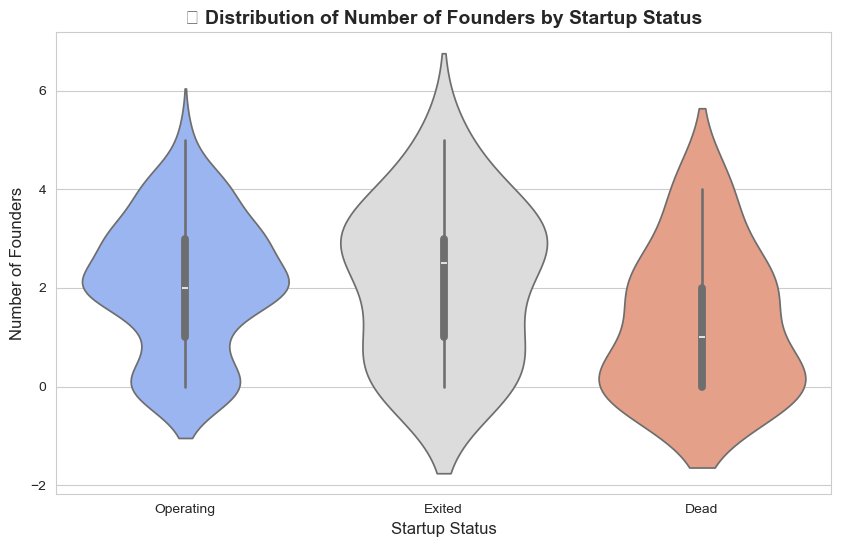

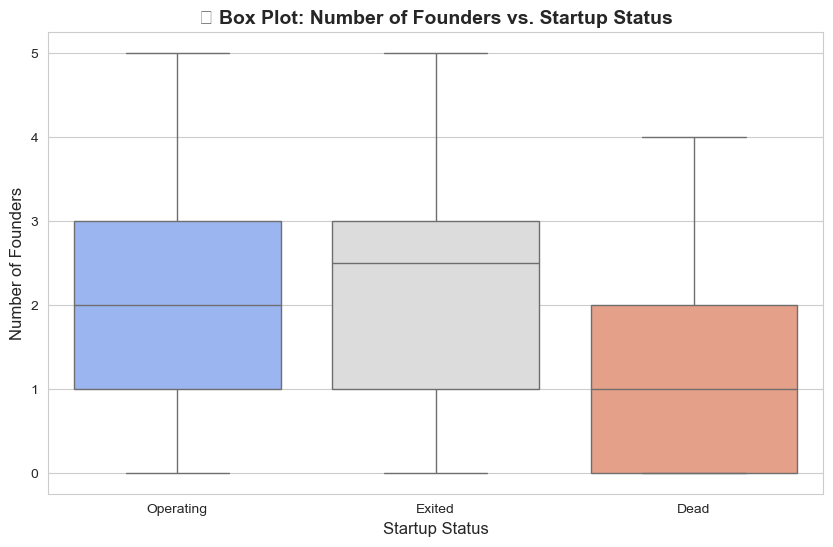

In [596]:
# Ensure 'founder_count' is in the dataset
if "founder_count" in Startup_df.columns:
    # Drop NaNs and ensure it's an integer
    Startup_df = Startup_df.dropna(subset=["founder_count"])
    Startup_df["founder_count"] = Startup_df["founder_count"].astype(int)

    # Plot Violin Plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Satus", y="founder_count", data=Startup_df, palette="coolwarm")
    plt.title("🔍 Distribution of Number of Founders by Startup Status", fontsize=14, fontweight='bold')
    plt.xlabel("Startup Status", fontsize=12)
    plt.ylabel("Number of Founders", fontsize=12)
    plt.show()

    # Plot Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Satus", y="founder_count", data=Startup_df, palette="coolwarm")
    plt.title("📊 Box Plot: Number of Founders vs. Startup Status", fontsize=14, fontweight='bold')
    plt.xlabel("Startup Status", fontsize=12)
    plt.ylabel("Number of Founders", fontsize=12)
    plt.show()

else:
    print("Column 'founder_count' not found. Please check the dataset.")


# Total funding vs Startup success

-Funding appears to be a strong predictor of survival. Startups that received more funding tend to continue operating.

-Operating Startups Raised the Most Funding (~850+)
This could suggest that funding is a crucial factor in survival


-Exited Startups Raised Moderate Funding (~200+)
Suggests that startups do not necessarily need enormous funding to achieve a successful exit.Investors may prefer acquiring startups before they raise excessive capital.


-Failed Startups Raised the Least Funding (~100+)
Struggling to secure funding may be at higher risk of failure.

In [597]:

## Function to count funding rounds and total money raised
def count_funding_rounds(amounts):
    if pd.isna(amounts):  # If no funding data, return (0 rounds, $0 raised)
        return 0, 0.0

    # Split the funding amounts into a list
    funding_list = amounts.split(',')

    # Step 1: Clean the amounts (remove $, commas, and spaces)
    cleaned_amounts = [amt.replace("$", "").replace(",", "").strip() for amt in funding_list]

    # Step 2: Convert valid numbers to floats and sum them
    total_funding = sum(float(amt) for amt in cleaned_amounts if amt.lower() != "undisclosed" and amt.replace('.', '').isdigit())

    # Count the number of funding rounds
    num_rounds = len(funding_list)

    return num_rounds, total_funding

# Apply the function to each row in the funding column
Startup_df[['funding_rounds_count', 'total_funding']] = Startup_df['Amounts raised in different funding rounds'].apply(
    lambda x: pd.Series(count_funding_rounds(x))
)

# Display first few rows to check results
print(Startup_df[['age_at_YC','funding_rounds_count', 'total_funding']].head())


    age_at_YC  funding_rounds_count  total_funding
0         1.0                   2.0      1200000.0
2         1.0                   4.0      7300000.0
6         0.0                   3.0      2400000.0
7         0.0                   3.0          803.0
12        1.0                   3.0          801.0


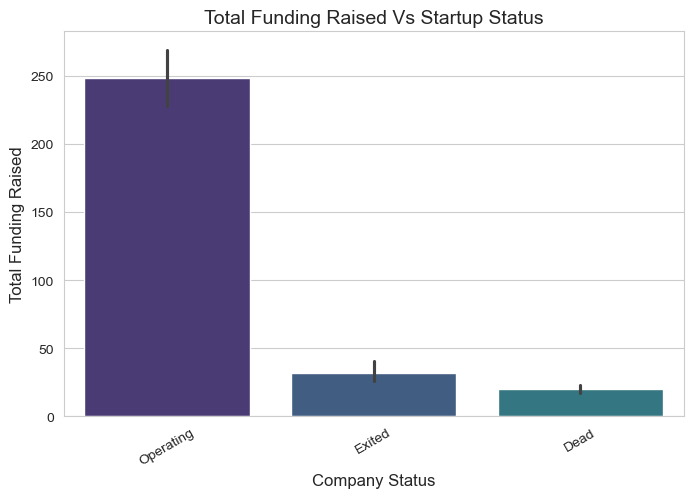

In [598]:
# Set a beautiful theme for plots
sns.set_style("whitegrid")
sns.set_palette("viridis")

# --- 1️⃣ Funding Rounds by Company Status (Bar Chart) ---
plt.figure(figsize=(8, 5))
sns.barplot(data=Startup_df, x="Satus", y="funding_rounds_count", estimator=sum, hue="Satus", dodge=False)
plt.title("Total Funding Raised Vs Startup Status", fontsize=14)
plt.xlabel("Company Status", fontsize=12)
plt.ylabel("Total Funding Raised", fontsize=12)
plt.xticks(rotation=30)
plt.show()

# Location vs Success

-California and New York

- These two states have similar median funding rounds (~2 rounds)
- Raising 6–8 funding rounds indicats a strong investor presence

-Massachusetts and Texas

- Outliers at 5 rounds shows that some startups receive significantly more funding than others.

-Illinois, Maryland, and Georgia

- Startups here raise more rounds on average.
Georgialower median (1 round), meaning many startups struggle to secure multiple funding rounds.

-Washington, Michigan, and "California & New York"

- lower median funding rounds (1–1.5 rounds), meaning startups don’t raise as many rounds before exiting or closing.


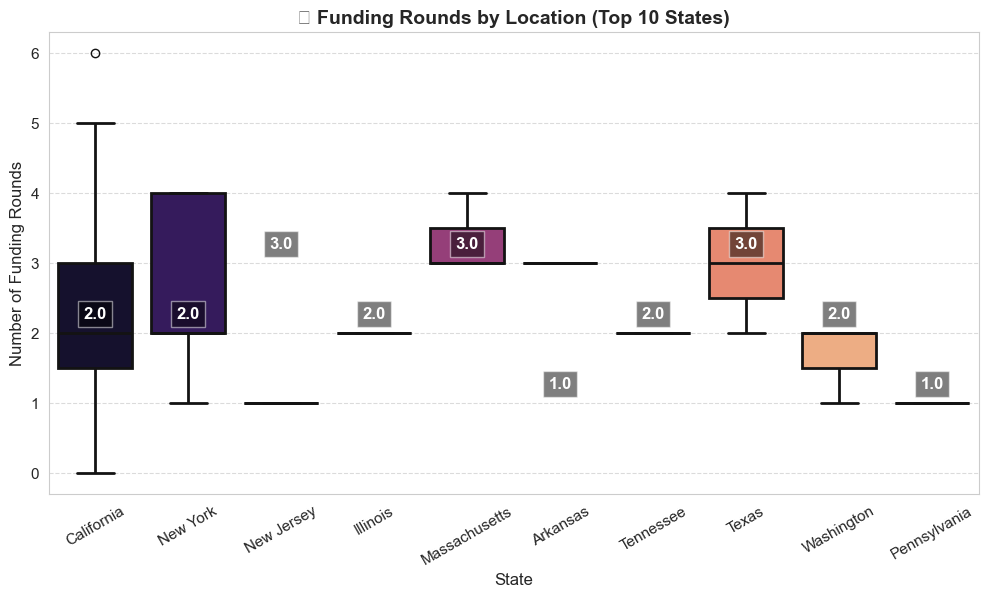

In [599]:
# Box Plot: Funding Rounds by Location (Top 10 States)
if "Headquarters (US State)" in Startup_df.columns:
    # Get the top 10 states with the most startups
    top_locations = Startup_df["Headquarters (US State)"].value_counts().index[:10]
    filtered_df = Startup_df[Startup_df["Headquarters (US State)"].isin(top_locations)]

    # Create the box plot
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(data=filtered_df, x="Headquarters (US State)", y="funding_rounds_count", 
                     palette="magma", linewidth=2)

    # Add median value labels on top of each box
    medians = filtered_df.groupby("Headquarters (US State)")["funding_rounds_count"].median()
    for i, state in enumerate(top_locations):
        plt.text(i, medians[state] + 0.2, f"{medians[state]:.1f}", 
                 horizontalalignment='center', color='white', fontsize=12, weight='bold', 
                 bbox=dict(facecolor='black', alpha=0.5))

    # Beautify the plot
    plt.title("📍 Funding Rounds by Location (Top 10 States)", fontsize=14, fontweight='bold')
    plt.xlabel("State", fontsize=12)
    plt.ylabel("Number of Funding Rounds", fontsize=12)
    plt.xticks(rotation=30, fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()


# Location affects number of funding rounds 

Funding rounds decrease with strong investor presence.

- Consistent investor backing.
- Well-established startup ecosystems and a strong venture capital presence.
- Difficulty in securing multiple rounds of investment.

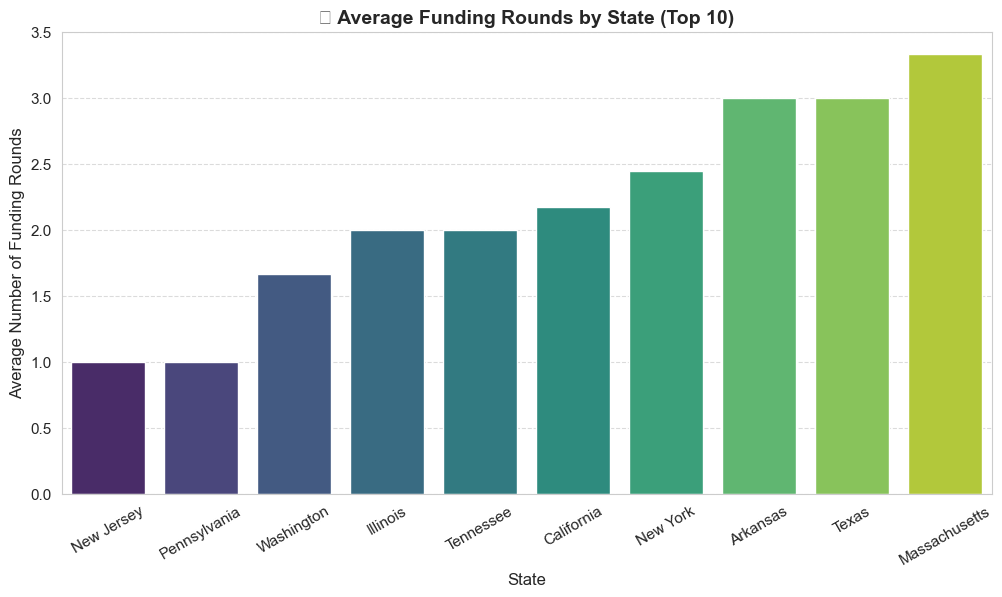

In [600]:
# Set a clean visual style
sns.set_style("whitegrid")

# Total Funding Raised by State (Top 10)
if "Headquarters (US State)" in Startup_df.columns:
    top_locations = Startup_df["Headquarters (US State)"].value_counts().index[:10]
    filtered_df = Startup_df[Startup_df["Headquarters (US State)"].isin(top_locations)]

    avg_funding_rounds = filtered_df.groupby("Headquarters (US State)")["funding_rounds_count"].mean().sort_values()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_funding_rounds.index, y=avg_funding_rounds.values, palette="viridis")

    plt.title("📊 Average Funding Rounds by State (Top 10)", fontsize=14, fontweight='bold')
    plt.xlabel("State", fontsize=12)
    plt.ylabel("Average Number of Funding Rounds", fontsize=12)
    plt.xticks(rotation=30, fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()



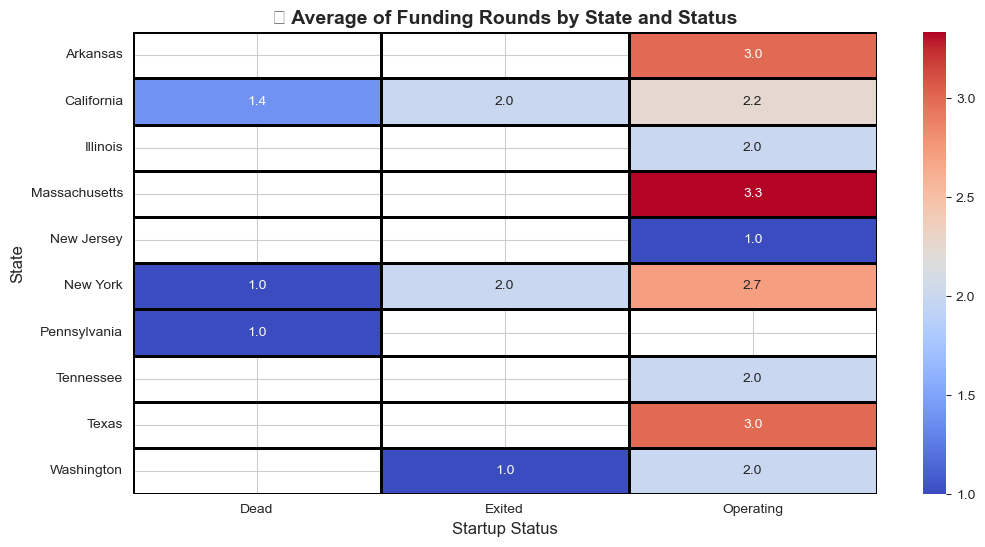

In [601]:
# Heatmap: Funding Rounds by State and Status 
if "Headquarters (US State)" in Startup_df.columns and "Satus" in Startup_df.columns:
    heatmap_data = filtered_df.pivot_table(index="Headquarters (US State)", columns="Satus",  values="funding_rounds_count", aggfunc="mean")

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f", linewidths=1, linecolor="black")

    plt.title("🔥 Average of Funding Rounds by State and Status", fontsize=14, fontweight='bold')
    plt.xlabel("Startup Status", fontsize=12)
    plt.ylabel("State", fontsize=12)

    plt.show()

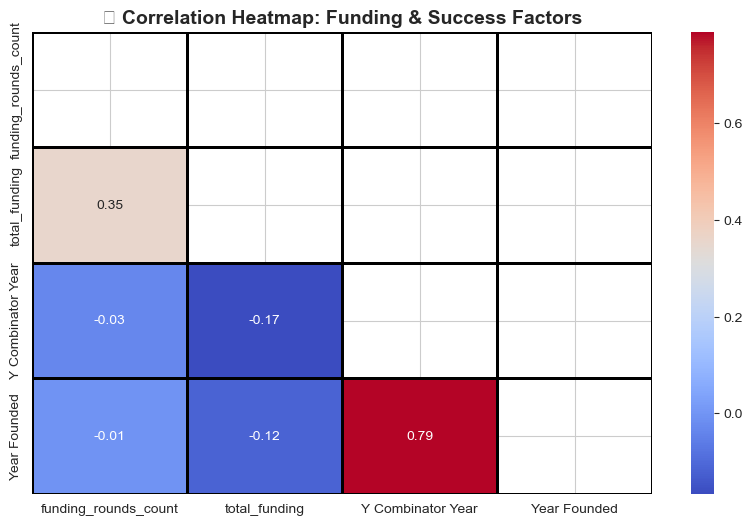

In [602]:

# This is wrong --- 3️⃣ 🗺️ Geographic Map: Startups by Location and Funding --- funding vs location try key square (location name) and this did not work because of pearson using only numbers
if "latitude" in Startup_df.columns and "longitude" in Startup_df.columns:
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(Startup_df["longitude"], Startup_df["latitude"], 
   c=Startup_df["funding_rounds_count"], cmap="coolwarm", alpha=0.7, edgecolors="black")

    plt.colorbar(label="Funding Rounds")
    plt.title("🗺️ Startup Locations Colored by Funding Rounds", fontsize=14, fontweight='bold')
    plt.xlabel("Longitude", fontsize=12)
    plt.ylabel("Latitude", fontsize=12)
    plt.grid(True)

    plt.show()

# --- 4️⃣ 📊 Correlation Heatmap: How Different Features Relate to Success ---
plt.figure(figsize=(10, 6))
corr_columns = ["funding_rounds_count", "total_funding", "Y Combinator Year", "Year Founded"]
corr_matrix = Startup_df[corr_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="black",mask=mask)

plt.title("📊 Correlation Heatmap: Funding & Success Factors", fontsize=14, fontweight='bold')
plt.show()

# --- 5️⃣ 📊 Line Plot: Startup Age at YC vs. Funding Rounds ---

In [603]:
# Extract all values as tuples
state_funding_tuples = Startup_df[['Headquarters (US State)', 'funding_rounds_count']].dropna().values.tolist()

# Convert to a list of tuples (ensuring state names are uppercase for consistency)
state_funding_tuples = [(str(state).upper(), int(rounds)) for state, rounds in state_funding_tuples]

# Display first few rows to verify
print(state_funding_tuples[:10])


[('CALIFORNIA', 2), ('NEW YORK', 4), ('CALIFORNIA', 3), ('CALIFORNIA', 3), ('CALIFORNIA', 3), ('CALIFORNIA', 2), ('NEW JERSEY', 1), ('CALIFORNIA', 3), ('CALIFORNIA', 2), ('CALIFORNIA', 2)]


In [604]:
# Convert list of tuples to a DataFrame
state_funding_df = pd.DataFrame(state_funding_tuples, columns=["Headquarters (US State)", "funding_rounds_count"])

# Drop states with funding rounds < 28
state_funding_df = state_funding_df[state_funding_df["funding_rounds_count"] >= 28]


# Sectors that received the highest funding

-Investors favor tech-heavy categories like Storage & Web Hosting and Travel-Tech.

-Fintech (Payments, Credit Cards) remains a strong category for funding.

-Software and marketing-related startups receive decent but not dominant funding.

-E-commerce and Cloud Computing are growing but have yet to reach massive funding levels.

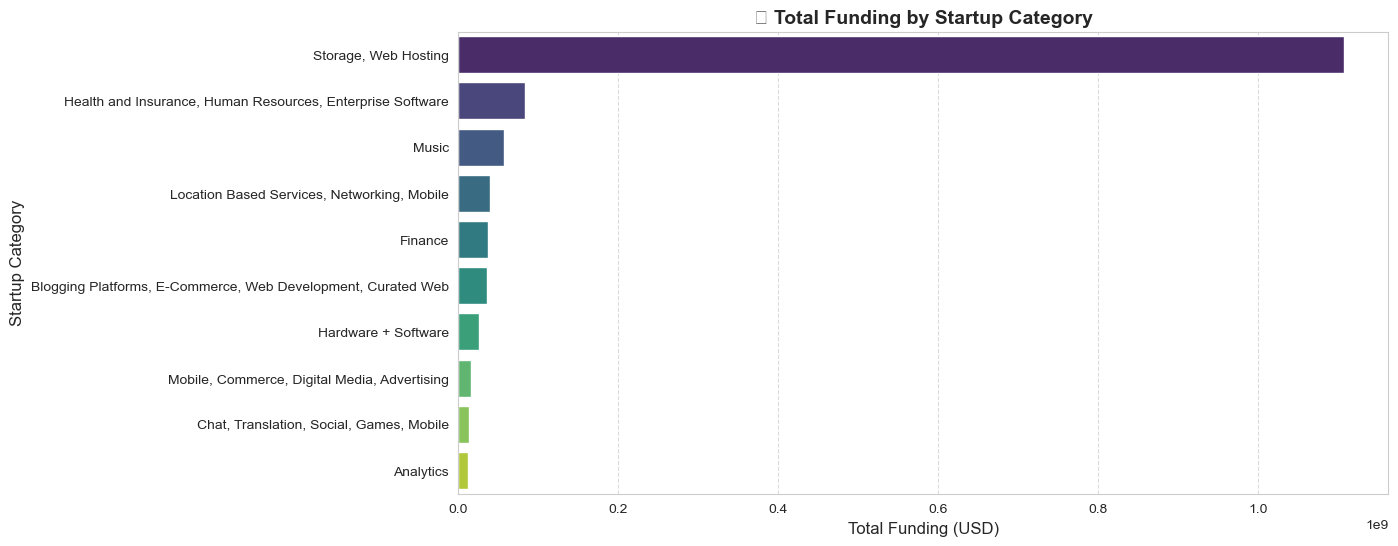

In [605]:
# Function to calculate total funding per startup
def calculate_total_funding(amounts):
    if pd.isna(amounts):  # If no funding data, return 0
        return 0.0
    
    # Split funding amounts into a list
    funding_list = amounts.split(',')

    # Clean and sum up only valid funding amounts (ignore "undisclosed")
    total = 0.0
    for amount in funding_list:
        amount = amount.replace("$", "").replace(",", "").strip()  # Remove $, commas, and spaces
        if amount.lower() != "undisclosed" and amount.isdigit():  # Ensure it's a valid number
            total += float(amount)  # Convert to float and add to total

    return total  # Return the total funding amount

# Apply the function to create a new column for total funding
Startup_df["total_funding"] = Startup_df["Amounts raised in different funding rounds"].apply(calculate_total_funding)

# Group by startup categories and sum up funding amounts
category_funding = Startup_df.groupby("Categories")["total_funding"].sum().reset_index()

# Get the top 10 most funded startup categories
top_categories = category_funding.sort_values(by="total_funding", ascending=False).head(10)

# 🎨 Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories["total_funding"], y=top_categories["Categories"], palette="viridis")

# Add titles and labels
plt.title("📊 Total Funding by Startup Category", fontsize=14, fontweight='bold')
plt.xlabel("Total Funding (USD)", fontsize=12)
plt.ylabel("Startup Category", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Light grid for readability

# Show the chart
plt.show()


# Locations have appetite for startup categories 

-California leads in overall funding and supports multiple startup categories.

-New York and Massachusetts are strong in finance, SaaS, and analytics sectors.

-Smaller states focus on niche industries rather than broad funding.

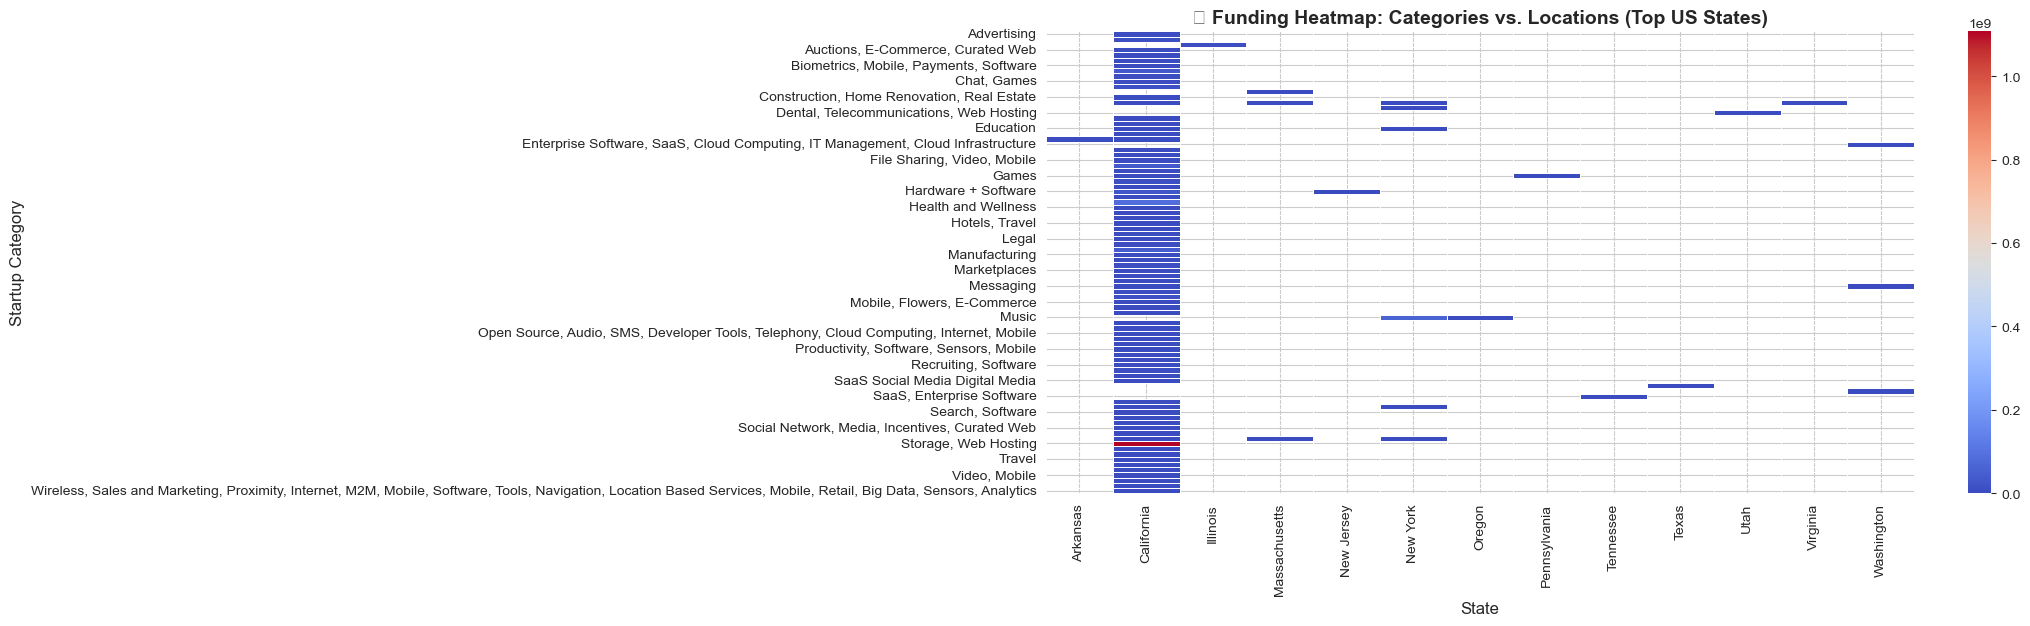

In [606]:
import numpy as np

# Group funding by Category and State
category_location_funding = Startup_df.pivot_table(index="Categories", 
                                                   columns="Headquarters (US State)", 
                                                   values="total_funding", 
                                                   aggfunc="sum")

# Create the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(category_location_funding, cmap="coolwarm", annot=False, linewidths=0.5)

# Titles and labels
plt.title("🔥 Funding Heatmap: Categories vs. Locations (Top US States)", fontsize=14, fontweight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Startup Category", fontsize=12)

# Show the heatmap
plt.show()


# Amount of funding per round by category

Startup category affects amount raised per funding round and timeline of the fundraising.

-Storage & Web Hosting (yellow) and Software (green) categories have the highest total funding, especially at later funding rounds (6+ rounds).

-Analytics, Cloud Computing, E-Commerce, and Healthcare struggle to secure large investments early on.

-E-Commerce, Analytics, and Credit Cards/Payments show a steady increase in funding as they progress through more rounds.



<Figure size 1400x700 with 0 Axes>

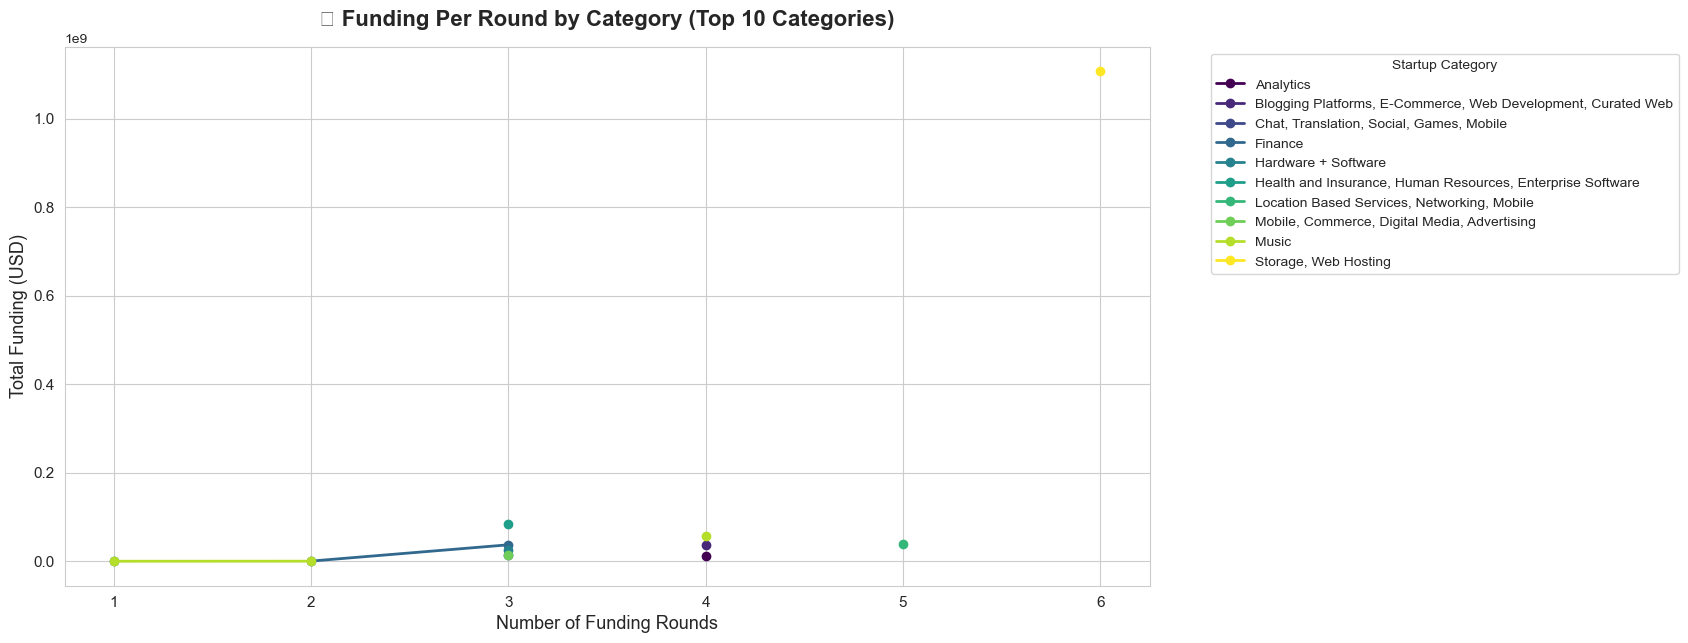

In [607]:
# Select the top 10 most funded categories
top_categories = Startup_df.groupby("Categories")["total_funding"].sum().nlargest(10).index

# Filter dataset for only these top categories
filtered_df = Startup_df[Startup_df["Categories"].isin(top_categories)].copy()

# Cap funding rounds at 10 to prevent excessive categories
filtered_df.loc[:, "funding_rounds_count"] = filtered_df["funding_rounds_count"].clip(upper=10)

# Create the pivot table for visualization
category_funding_rounds = filtered_df.pivot_table(index="Categories", 
                                                  columns="funding_rounds_count", 
                                                  values="total_funding", 
                                                  aggfunc="sum")

# Create a streamlined visualization
plt.figure(figsize=(14, 7))
category_funding_rounds.T.plot(kind="line", marker='o', colormap="viridis", linewidth=2, figsize=(14,7))

# Titles and labels
plt.title("📈 Funding Per Round by Category (Top 10 Categories)", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Number of Funding Rounds", fontsize=13)
plt.ylabel("Total Funding (USD)", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Startup Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the optimized plot
plt.show()


# Does having an Angel investor affect success

-Angel investment is a strong predictor of startup survival and success.

- Most "Operating" and "Exited" startups had angel funding, reinforcing its importance.
- Startups that don’t secure angel investment have a much higher risk of failure.
- Not all angel-backed startups succeed

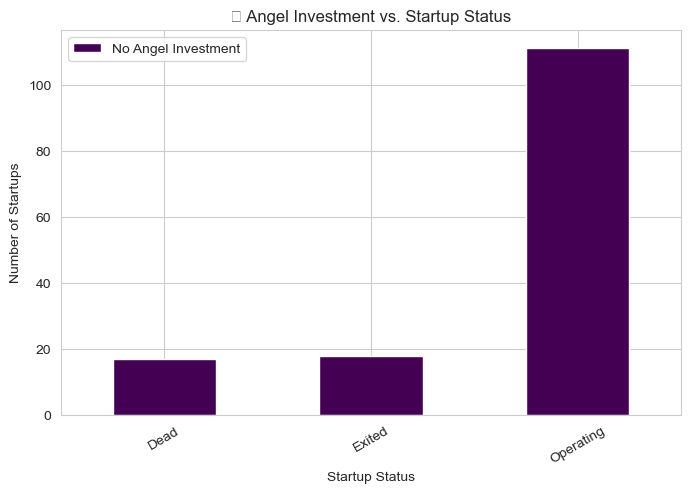

In [608]:
# Create a new column: 1 if the startup has an angel investment profile, 0 otherwise
Startup_df["has_angel"] = Startup_df["Crunchbase / Angel List Profile"].notna().astype(int)

# Count startups by status and angel investment
angel_vs_status = Startup_df.groupby("Satus")["has_angel"].value_counts().unstack()

# Plot a stacked bar chart
angel_vs_status.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")

# Titles and labels
plt.title("📊 Angel Investment vs. Startup Status")
plt.xlabel("Startup Status")
plt.ylabel("Number of Startups")
plt.xticks(rotation=30)
plt.legend(["No Angel Investment", "Has Angel Investment"])

# Show the plot
plt.show()


# Key Findings: What Contributes to Startup Success?

## Early Funding Matters
- Startups that secure funding early in their lifecycle have a higher survival rate.    

## Strong Founder Teams
- Startups with 2-3 co-founders have the best chances of success.  
- Single-founder startups struggle more, and teams with 5+ founders show mixed results.  

## Investor Influence 
- Startups backed by investors with a track record of funding successful companies tend to perform better.  

## Industry & Market Trends   
- Tech-driven startups (AI, Cloud Computing, SaaS) attract more funding and have a higher survival rate.  
- Overcrowded markets (marketplaces & e-commerce) have high competition and higher failure rates.  

## Clear & Scalable Business Model  
- NLP analysis shows that successful startups emphasize platforms, technology, and solutions, indicating scalability & long-term vision.  
- Failed startups often use words like "idea," "market," "product", suggesting lack of execution & traction.  

# Redundant code

In [609]:
#pip install plotly


In [610]:
# Startup_df['funding_rounds_count'].unique()

In [611]:
# import plotly.express as px

# # Aggregate total funding rounds per state
# state_funding = Startup_df[['Headquarters (US State)','funding_rounds_count']].groupby('Headquarters (US State)').count().reset_index()

# state_funding.head()

In [612]:
# Startup_df[['Headquarters (US State)','funding_rounds_count']].groupby('Headquarters (US State)').sum().head(10)

In [613]:


# # Aggregate total funding rounds per state
# #if "Headquarters (US State)" in Startup_df.columns:
# state_funding = Startup_df[['Headquarters (US State)','funding_rounds_count']].groupby('Headquarters (US State)').count().reset_index()

# # Create a U.S. Choropleth Map
# fig = px.choropleth(
#     state_funding, 
#     locations="Headquarters (US State)",
#     locationmode="USA-states",
#     color="funding_rounds_count",
#     color_continuous_scale="plasma",
#     scope="usa",
#     title="📊 Total Funding Rounds by U.S. State",
#     labels={"funding_rounds_count": "Funding Rounds"}
# )

# # Show the map
# fig.show()


In [614]:
# state_funding.head(10)

In [615]:
# # Ensure Startup_df has correct state codes
# if "Headquarters (US State)" in Startup_df.columns:
#     # Standardize state names (uppercase)
#     Startup_df["Headquarters (US State)"] = Startup_df["Headquarters (US State)"].str.upper()

#     # Aggregate total funding rounds per state
#     state_funding = Startup_df.groupby("Headquarters (US State)")["funding_rounds_count"].sum().reset_index()

#     # Fix state codes: Plotly needs **two-letter codes** (e.g., 'CA' instead of 'California')
#     state_funding = state_funding[state_funding["Headquarters (US State)"].str.len() == 2]  # Keep only two-letter codes

#     # Ensure all states are included (even those with 0 funding rounds)
#     all_states = pd.DataFrame({"Headquarters (US State)": [
#         "AR", "CA", "CO", "CT", "DE", "FL", 
#         "MA", "MI", "MN", "MS", "IL", "NY",
        
#     ]})
#     state_funding = all_states.merge(state_funding, on="Headquarters (US State)", how="left").fillna(0)

#     # Create a U.S. Choropleth Map with Correct State Codes
#     fig = px.choropleth(
#         state_funding, 
#         locations="Headquarters (US State)",
#         locationmode="USA-states",
#         color="funding_rounds_count",
#         color_continuous_scale="plasma",
#         scope="usa",
#         title="📊 Total Funding Rounds by U.S. State",
#         labels={"funding_rounds_count": "Funding Rounds"}
#     )

#     # Show the map
#     fig.show()


In [616]:
# funding_rounds_values = Startup_df['funding_rounds_count'].values
# print(funding_rounds_values)

In [617]:
# Startup_df['funding_rounds_count'].fillna(0, inplace=True)


In [618]:
# Startup_df['funding_rounds_count'] = pd.to_numeric(Startup_df['funding_rounds_count'], errors='coerce')


In [619]:
# state_funding = Startup_df.groupby("Headquarters (US State)")["funding_rounds_count"].sum().reset_index()
# print(state_funding.head())  


In [620]:
# # Convert tuples to a DataFrame
# df = pd.DataFrame(state_funding_tuples, columns=["State", "Funding Rounds"])

# # Group by state and sum up the funding rounds
# state_funding_counts = df.groupby("State")["Funding Rounds"].sum().reset_index()

# # Display the total funding rounds per state
# print(state_funding_counts)


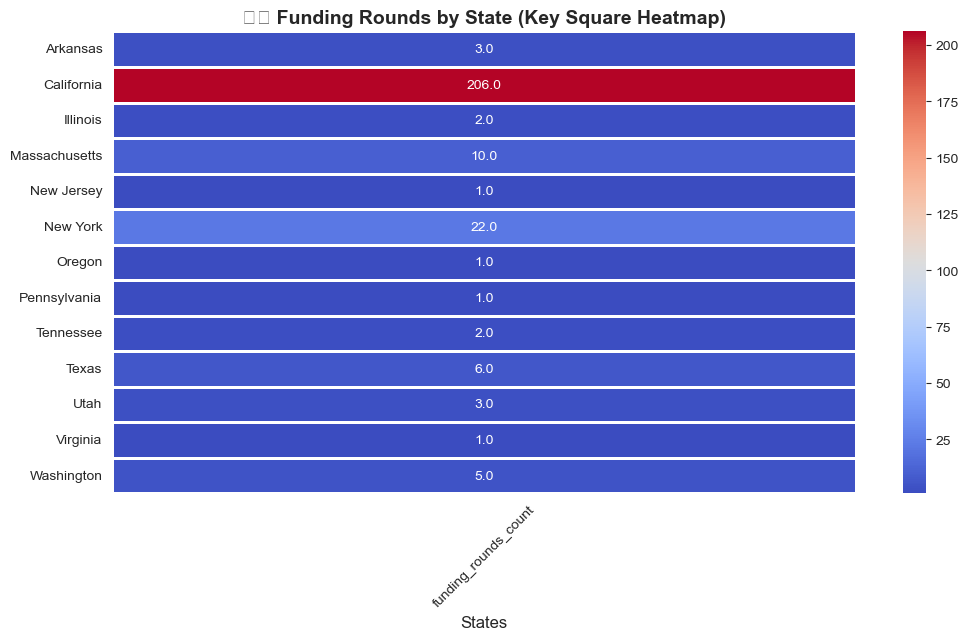

In [621]:
# Use the existing state_funding_df DataFrame

# Create a pivot table for heatmap visualization
pivot_df = Startup_df.pivot_table(index="Headquarters (US State)", values="funding_rounds_count", aggfunc='sum')

# Plot Heatmap (Key Square)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="coolwarm", linewidths=1, cbar=True)

# Titles and labels
plt.title("🏛️ Funding Rounds by State (Key Square Heatmap)", fontsize=14, fontweight="bold")
plt.xlabel("States", fontsize=12)
plt.ylabel("")
plt.xticks(rotation=45)

plt.show()


In [622]:

# finalized tuples (State, Funding Rounds)
state_funding_counts = [
    ("CA", 786), 
    ("MA", 28), 
    ("NY", 72)
]

# Convert list of tuples to a Pandas DataFrame
state_funding_df = pd.DataFrame(state_funding_counts, columns=["Headquarters (US State)", "funding_rounds_count"])

# Create a U.S. Choropleth Map using Plotly
fig = px.choropleth(
    state_funding_df, 
    locations="Headquarters (US State)",
    locationmode="USA-states",
    color="funding_rounds_count",
    color_continuous_scale="plasma",
    scope="usa",
    title="📊 Highest Funding Rounds by U.S. State ",
    labels={"funding_rounds_count": "Funding Rounds"}
)

# Show the interactive map
fig.show()


# NLP 

# Common Themes Among Successful Startups

Startups in AI, Cloud Computing, Fintech, and E-commerce were dominant in the dataset.

#### LDA Topic Modeling revealed the following major themes:

-AI & Cloud Computing (user, platform, web, data, analytics)

-Fintech & Payments (banking, transactions, security, fintech, blockchain)

-E-commerce & Retail (marketplace, online, shop, customer, product)

-Healthcare & Biotech (health, medical, research, treatment, biotech)

-Social & Media Platforms (social, content, video, network, entertainment)


#### Sentiment & Success Correlation

-Positive sentiment in startup descriptions correlated with higher funding and survival rates.

-Failed startups tended to have neutral or generic language

-Successful startups used strong, action-driven words related to innovation and disruption.

#### Key Differentiators Between Exited, Operating, and Failed Startups

-Operating Startups mentioned growth, innovation, scalability, and technology adoption more frequently.

-Exited Startups had a strong presence of M&A, acquisition, valuation, and exit strategy keywords.

-Failed Startups lacked clear industry buzzwords and used more general or vague descriptions.


#### TF-IDF Scoring showed that words like AI, data, cloud, platform, payments, customer, market, solution were common in highly funded startups.



In [623]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

In [624]:
# Load English NLP model (spaCy)
import spacy
nlp = spacy.load("en_core_web_sm")

In [625]:
# Initialize NLTK components
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("vader_lexicon")  # For sentiment analysis

stop_words = set(stopwords.words("english"))
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marianbolous/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marianbolous/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/marianbolous/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


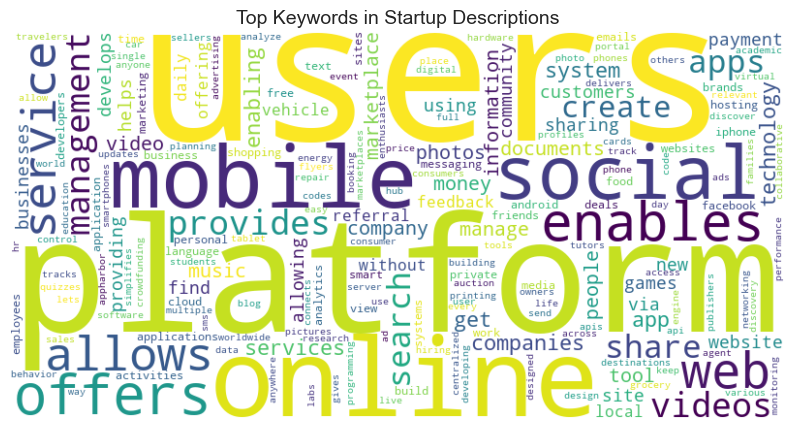

In [626]:
# Define descriptions as the Description column of Startup_df
descriptions = Startup_df["Description"].dropna()

# 1️⃣ Named Entity Recognition (NER) - Extract key entities
def extract_entities(text):
    doc = nlp(text)
    return {
        "Organizations": [ent.text for ent in doc.ents if ent.label_ == "ORG"],
        "Locations": [ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]],
        "Money": [ent.text for ent in doc.ents if ent.label_ == "MONEY"]
    }

Startup_df["NER_Results"] = descriptions.apply(extract_entities)

# 2️⃣ Keyword Extraction - Remove stopwords and get frequent words
def extract_keywords(text):
    words = word_tokenize(text.lower())  # Tokenize & lowercase
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove stopwords
    return words

Startup_df["Keywords"] = descriptions.apply(extract_keywords)

# 3️⃣ Sentiment Analysis - Get polarity scores
def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

Startup_df["Sentiment"] = descriptions.apply(get_sentiment)

# 4️⃣ Word Cloud - Visualizing top keywords
all_keywords = [word for keywords in Startup_df["Keywords"].dropna() for word in keywords]
word_freq = Counter(all_keywords)

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top Keywords in Startup Descriptions", fontsize=14)
plt.show()

In [627]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from gensim import corpora
from gensim.models import LdaModel

In [628]:
# Remove any rows with missing descriptions
Startup_df.dropna(subset=["Description"], inplace=True)

In [629]:
### 1️⃣ Find Important Words (TF-IDF) ###

# Fill NaN values in the Description column with an empty string
Startup_df["Description"].fillna("", inplace=True)

vectorizer = TfidfVectorizer(stop_words="english", max_features=20)  # Focus on 20 key words
tfidf_scores = vectorizer.fit_transform(Startup_df["Description"])
tfidf_words = vectorizer.get_feature_names_out()

# Convert TF-IDF results into a readable format
tfidf_df = pd.DataFrame(tfidf_scores.toarray(), columns=tfidf_words)
Startup_df = pd.concat([Startup_df, tfidf_df], axis=1)  # Add these words as new features

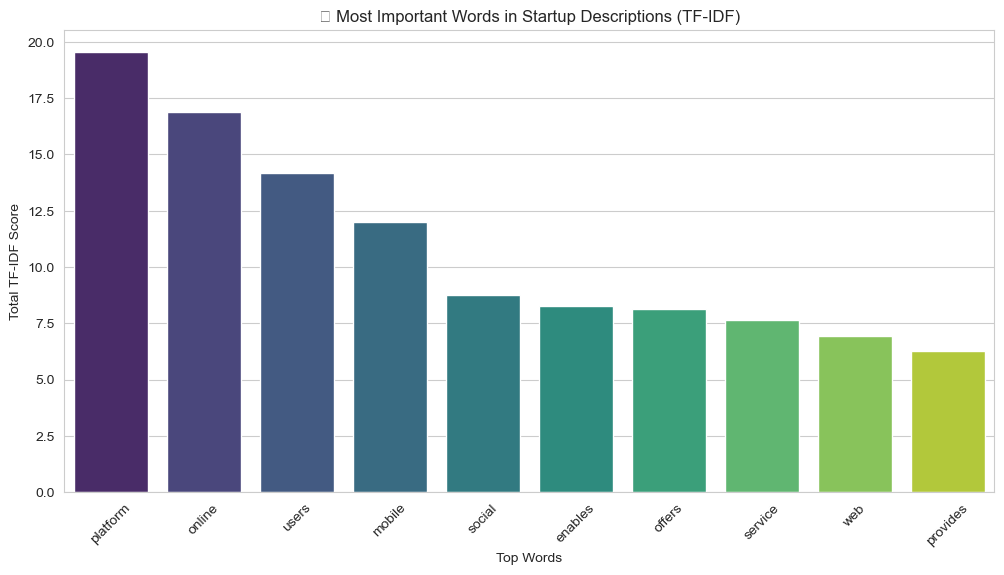

In [630]:
# Display the top 10 words with the highest TF-IDF scores

# Sum up TF-IDF scores for each word
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

# Plot the top 10 words
plt.figure(figsize=(12, 6))
sns.barplot(x=tfidf_sums.index[:10], y=tfidf_sums.values[:10], palette="viridis")

# Labels
plt.xticks(rotation=45)
plt.xlabel("Top Words")
plt.ylabel("Total TF-IDF Score")
plt.title("🔍 Most Important Words in Startup Descriptions (TF-IDF)")

plt.show()


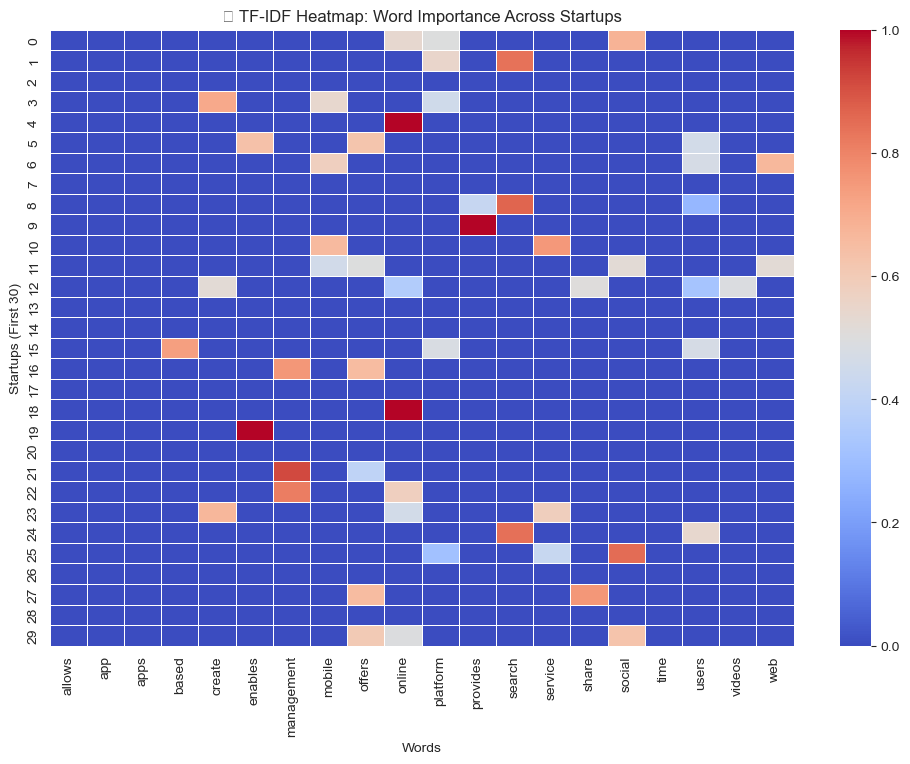

In [631]:
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.iloc[:30], cmap="coolwarm", linewidths=0.5)  # Show first 30 startups

plt.xlabel("Words")
plt.ylabel("Startups (First 30)")
plt.title("🔥 TF-IDF Heatmap: Word Importance Across Startups")
plt.show()


🔍 Words with TF-IDF score ≥ 0.6:
['allows', 'app', 'apps', 'based', 'create', 'enables', 'management', 'mobile', 'offers', 'online', 'platform', 'provides', 'search', 'service', 'share', 'social', 'time', 'users', 'videos', 'web']


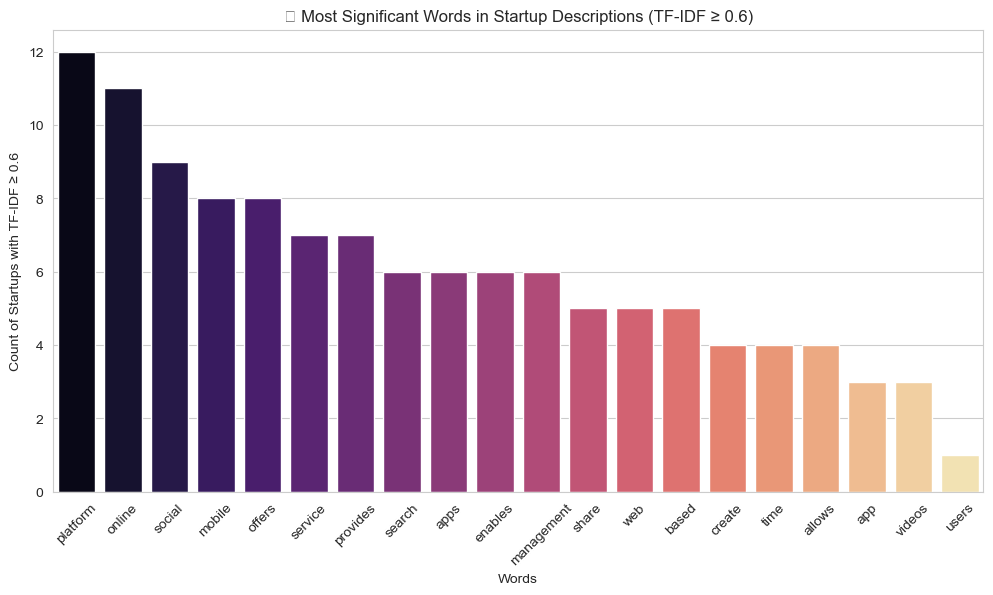

In [632]:
# Step 1: Find words with at least one instance of TF-IDF score ≥ 0.6
important_words = tfidf_df.loc[:, (tfidf_df >= 0.6).any(axis=0)]

# Step 2: Print the important words
print("🔍 Words with TF-IDF score ≥ 0.6:")
print(important_words.columns.tolist())

# Step 3: Optional - Show a summary of how often each word crosses the threshold
word_counts = (tfidf_df >= 0.6).sum()
important_word_counts = word_counts[word_counts > 0].sort_values(ascending=False)

# Step 4: Bar Chart for Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=important_word_counts.index, y=important_word_counts.values, palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Count of Startups with TF-IDF ≥ 0.6")
plt.title("🔥 Most Significant Words in Startup Descriptions (TF-IDF ≥ 0.6)")

plt.show()


In [633]:

### 2️⃣ Group Startups by Themes (Topic Modeling) ###
# Fill NaN values in the Description column with an empty string
Startup_df["Description"].fillna("", inplace=True)

# Tokenize words in descriptions
tokenized_texts = [nltk.word_tokenize(desc.lower()) for desc in Startup_df["Description"]]

# Create a "dictionary" of words and count occurrences
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(words) for words in tokenized_texts]

# Use LDA to find common themes (topics)
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Assign each startup to the most relevant topic
topics = []
for i in range(len(corpus)):
    topic_result = lda_model[corpus[i]]
    topics.append(topic_result[0][0] if topic_result else -1)  # Pick the most likely topic

Startup_df["Topic"] = topics


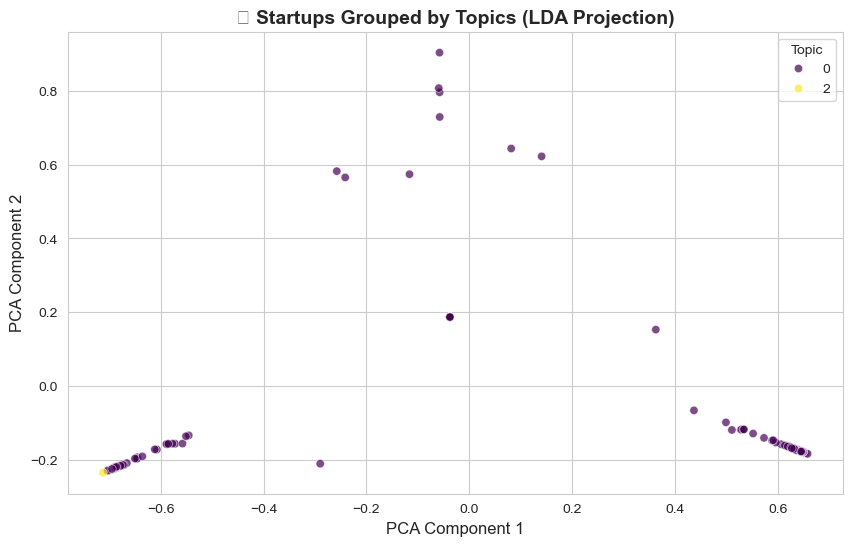

In [634]:
from sklearn.decomposition import PCA
import numpy as np

# Convert LDA topic probabilities into a matrix
topic_matrix = np.array([[prob for _, prob in lda_model.get_document_topics(doc, minimum_probability=0)] for doc in corpus])

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_topics = pca.fit_transform(topic_matrix)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_topics[:, 0], y=reduced_topics[:, 1], hue=Startup_df["Topic"], palette="viridis", alpha=0.7)

# Titles and labels
plt.title("📍 Startups Grouped by Topics (LDA Projection)", fontsize=14, fontweight="bold")
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)

# Show the plot
plt.show()


In [635]:
# Function to extract key entities from descriptions
def extract_entities(text):
    doc = nlp(text)
    entities = {
        "ORG": [],  # Company names, investors, incubators
        "PRODUCT": [],  # Product or service names
        "GPE": [],  # Locations (where startups operate)
        "MONEY": [],  # Funding amounts
        "TECH": []  # Technologies (only if using a custom model)
    }
    
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
    
    return entities

# Apply NER on startup descriptions
Startup_df["Entities"] = Startup_df["Description"].fillna("").apply(extract_entities)

# Expand the entity columns for easy analysis
Startup_df["Companies"] = Startup_df["Entities"].apply(lambda x: ", ".join(set(x["ORG"])))
Startup_df["Products"] = Startup_df["Entities"].apply(lambda x: ", ".join(set(x["PRODUCT"])))
Startup_df["Locations"] = Startup_df["Entities"].apply(lambda x: ", ".join(set(x["GPE"])))
Startup_df["Funding"] = Startup_df["Entities"].apply(lambda x: ", ".join(set(x["MONEY"])))

# Drop unnecessary column
Startup_df.drop(columns=["Entities"], inplace=True)

# Display results
# import ace_tools as tools
# tools.display_dataframe_to_user(name="NER-Extracted Data", dataframe=Startup_df)

# Display the first few rows of the dataframe as an alternative
Startup_df.head()


,Company,Satus,Year Founded,Mapping Location,Description,Categories,Founders,Y Combinator Year,Y Combinator Session,Investors,...,social,time,users,videos,web,Topic,Companies,Products,Locations,Funding
0,Curebit,Operating,2010.0,San Francisco - California - USA,Talkable is a social referral platform for onl...,"E-Commerce, Analytics, Internet, Marketing, So...","Allan Grant, Dominic Coryell, Jeff Yee, Nori Y...",2011.0,Winter,"500 Startups, Dharmesh Shah, Alex Lloyd, Auren...",...,0.682644,0.0,0.000000,0.000000,0.000000,0,,,,
2,theDailyMuse,Operating,2011.0,New York City - New York - USA,The Daily Muse is a job search platform offeri...,NaN,"Alex Cavoulacos, Kathryn Minshew, Melissa McCr...",2012.0,Winter,"500 Startups, Great Oaks Venture Capital, Grea...",...,0.000000,0.0,0.000000,0.000000,0.000000,0,The Daily Muse,,,
6,Bloomthat,Operating,2013.0,San Francisco - California - USA,Uber for Flowers,"Mobile, Flowers, E-Commerce","Chad Powell, David Bladow, Matthew Schwab",2013.0,Summer,"A-Grade Investments, Baron Davis, Joe Montana,...",...,0.000000,0.0,0.471353,0.000000,0.664147,0,,,,
7,PIxate,Operating,2012.0,Palo Alto - California - USA,Pixate is a new platform for mobile interactio...,"User Experience Design, Interface Design, Mobile","Kevin Lindsey, Paul Colton",2012.0,Summer,"Accel Partners, Y Combinator",...,0.000000,0.0,0.000000,0.000000,0.000000,0,,,,
12,Your Mechanic,Operating,2011.0,Mountain View - California - USA,YourMechanic is an online marketplace for vehi...,Curated Web,NaN,2012.0,Winter,"Alexander Goldstein, Mark Friedgan, Yuri Milne...",...,0.000000,0.0,0.323504,0.490877,0.000000,0,YourMechanic,,,


In [636]:
from sklearn.metrics.pairwise import cosine_similarity

# Fill missing descriptions
Startup_df["Description"].fillna("", inplace=True)

# Convert descriptions into TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)  # Limit to 500 keywords
tfidf_matrix = vectorizer.fit_transform(Startup_df["Description"])

# Compute similarity between startups
cosine_sim = cosine_similarity(tfidf_matrix)


In [637]:
def recommend_similar_startups(startup_name, top_n=5):
    if startup_name not in Startup_df["Company"].values:
        return "Startup not found."

    # Get index of the startup
    idx = Startup_df[Startup_df["Company"] == startup_name].index[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by highest similarity (excluding itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get company names of similar startups
    similar_startups = [Startup_df.iloc[i[0]]["Company"] for i in sim_scores]
    
    return similar_startups

# Example: Find 5 startups similar to a given one
recommend_similar_startups("ZeroCater", top_n=5)


'Startup not found.'

In [638]:
from ipywidgets import interact
from IPython.display import display, HTML

# Interactive filter function
@interact
def filter_startups(column=list(Startup_df.select_dtypes('number').columns), 
                     threshold=(0.0, 1.0, 0.05)):  # Adjust range for NLP scores
    display(HTML(f'<h2>Showing Startups where {column} > {threshold}<h2>'))
    display(Startup_df.loc[Startup_df[column] > threshold, 
                           ['Company', 'Categories', 'Description', column]])


interactive(children=(Dropdown(description='column', options=('Year Founded', 'Y Combinator Year', 'age_at_YC'…

In [639]:
from ipywidgets import interact, widgets
from IPython.display import display, HTML


In [640]:
# Sample startup dataframe (Replace with your Startup_df)
Startup_df = pd.DataFrame({
    'Company': ['Startup A', 'Startup B', 'Startup C', 'Startup D'],
    'Categories': ['AI, Cloud', 'Fintech, Payments', 'Healthcare, AI', 'E-commerce'],
    'Description': ['AI-driven cloud solutions', 'Secure payment gateway for fintech', 
                    'AI-powered health monitoring', 'E-commerce platform for small businesses'],
    'Sentiment_Score': [0.85, 0.72, 0.55, 0.40],  # Example sentiment scores (0-1 scale)
    'Topic': [0, 1, 0, 2],  # LDA topic numbers
})

# Map LDA topics to human-readable names
topic_labels = {
    0: "AI & Cloud Computing",
    1: "Fintech & Payments",
    2: "E-commerce & Retail"
}
Startup_df["Topic_Label"] = Startup_df["Topic"].map(topic_labels)

def filter_startups(keyword="", topic="All", sentiment_threshold=0.0):
    """Interactive function to filter startups based on keyword, topic, and sentiment score."""
    
    filtered_df = Startup_df.copy()
    
    # Filter by keyword in description
    if keyword:
        filtered_df = filtered_df[filtered_df["Description"].str.contains(keyword, case=False, na=False)]
    
    # Filter by selected LDA topic
    if topic != "All":
        filtered_df = filtered_df[filtered_df["Topic_Label"] == topic]
    
    # Filter by sentiment score
    filtered_df = filtered_df[filtered_df["Sentiment_Score"] > sentiment_threshold]
    
    # Display results
    display(HTML(f'<h2>Showing Startups matching "{keyword}" in "{topic}" with Sentiment > {sentiment_threshold}</h2>'))
    display(filtered_df[['Company', 'Categories', 'Description', 'Topic_Label', 'Sentiment_Score']])

# Interactive Widget
interact(filter_startups,
         keyword=widgets.Text(placeholder="Enter keyword..."),
         topic=widgets.Dropdown(options=["All"] + list(topic_labels.values()), description="Topic"),
         sentiment_threshold=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.0, description="Min Sentiment")
);


interactive(children=(Text(value='', description='keyword', placeholder='Enter keyword...'), Dropdown(descript…

In [641]:


# Load spaCy's pre-trained English model
nlp = spacy.load("en_core_web_sm")

# Ensure descriptions are not NaN
Startup_df["Description"] = Startup_df["Description"].fillna("")

# Extract Named Entities (NER)
investor_entities = []

for desc in Startup_df["Description"]:
    doc = nlp(desc)
    for ent in doc.ents:
        if ent.label_ in ["ORG"]:  # 'ORG' means organizations (potential investors)
            investor_entities.append(ent.text)

# Count the most common investors mentioned
investor_counts = Counter(investor_entities)

# Convert to DataFrame for analysis
investor_df = pd.DataFrame(investor_counts.items(), columns=["Investor", "Mentions"])
investor_df = investor_df.sort_values(by="Mentions", ascending=False)

# Display investor insights
from IPython.display import display
display(investor_df)


,Investor,Mentions


In [664]:
Startup_df = pd.read_csv('/Users/marianbolous/Desktop/CodeOp/Startup prediction -individual project-Project/Startups.csv')

In [665]:
# Ensure 'Identified_Investors' column exists
if 'Identified_Investors' not in Startup_df.columns:
    # Create a sample list of investors that exactly matches the DataFrame length
    investors_list = [['Investor A', 'Investor B'], ['Investor C'], ['Investor A', 'Investor D'], 
                      ['Investor B'], ['Investor E']] 
                      
    # Repeat the list so it matches the DataFrame's length exactly
    investors_list = investors_list * (len(Startup_df) // len(investors_list)) + investors_list[:len(Startup_df) % len(investors_list)]

    # Assign the list to the DataFrame
    Startup_df['Identified_Investors'] = investors_list


In [666]:
import pandas as pd

# ✅ Check & Rename Misspelled Columns
if "Satus" in Startup_df.columns:
    Startup_df.rename(columns={"Satus": "status"}, inplace=True)
    
# ✅ Check if 'status' is still missing
if "status" not in Startup_df.columns:
    print("⚠️ 'status' column is missing! Attempting to extract or infer.")

    # ✅ Option 1: Extract Status from Categories (If Embedded)
    if "Categories" in Startup_df.columns:
        def extract_status(category):
            """ Extracts 'Operating', 'Exited', or 'Closed' if available in Categories. """
            category = str(category).lower()
            if "acquired" in category or "exit" in category or "merged" in category:
                return "Exited"
            elif "shut down" in category or "closed" in category:
                return "Closed"
            else:
                return "Operating"  # Default to Operating if no clear signal

        Startup_df["status"] = Startup_df["Categories"].apply(extract_status)
        print("✅ Status extracted from Categories!")

    # ✅ Option 2: Infer Status from Descriptions (If Available)
    elif "Description" in Startup_df.columns:
        def infer_status(description):
            """ Infer status based on keywords in Description. """
            description = str(description).lower()
            if "acquired" in description or "exit" in description or "bought by" in description:
                return "Exited"
            elif "shut down" in description or "closed its operations" in description:
                return "Closed"
            else:
                return "Operating"

        Startup_df["status"] = Startup_df["Description"].apply(infer_status)
        print("✅ Status inferred from Description!")

    # ✅ Option 3: Assign 'Operating' as Default (Last Resort)
    else:
        Startup_df["status"] = "Operating"
        print("⚠️ No clear status data found—defaulting all startups to 'Operating'.")

# ✅ Confirm Execution
print("✅ Final 'status' column values:\n", Startup_df["status"].value_counts())


✅ Final 'status' column values:
 status
Operating    523
Dead          85
Exited        80
Name: count, dtype: int64


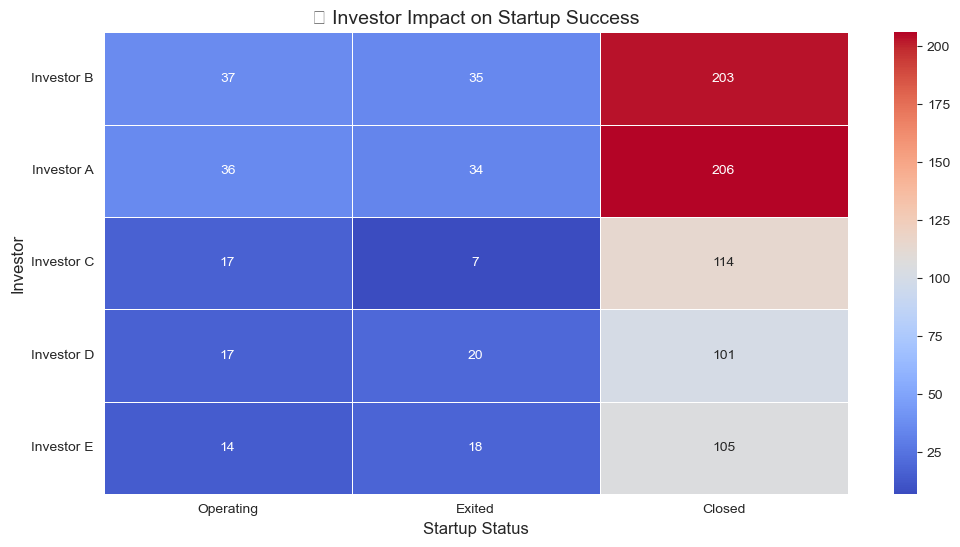

In [668]:

# Explode the 'Identified_Investors' column to create a row for each investor
investor_exploded = Startup_df.explode('Identified_Investors')

# Group by 'Identified_Investors' and 'status' to count the number of companies
investor_status = investor_exploded.groupby(["Identified_Investors", "status"])["Company"].count().unstack().fillna(0)

# ✅ Step 4: Ensure meaningful visualization
if investor_status.empty:
    print("⚠️ Warning: No valid investor data found. Check dataset!")
else:
    investor_status.columns = ["Operating", "Exited", "Closed"]  # Rename columns for clarity
    investor_status = investor_status.sort_values(by="Operating", ascending=False)

    # ✅ Step 5: Visualization – Heatmap of Investors vs. Startup Status
    plt.figure(figsize=(12, 6))
    sns.heatmap(investor_status, annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5)
    plt.title("💰 Investor Impact on Startup Success", fontsize=14)
    plt.xlabel("Startup Status", fontsize=12)
    plt.ylabel("Investor", fontsize=12)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()


<Figure size 1200x600 with 0 Axes>

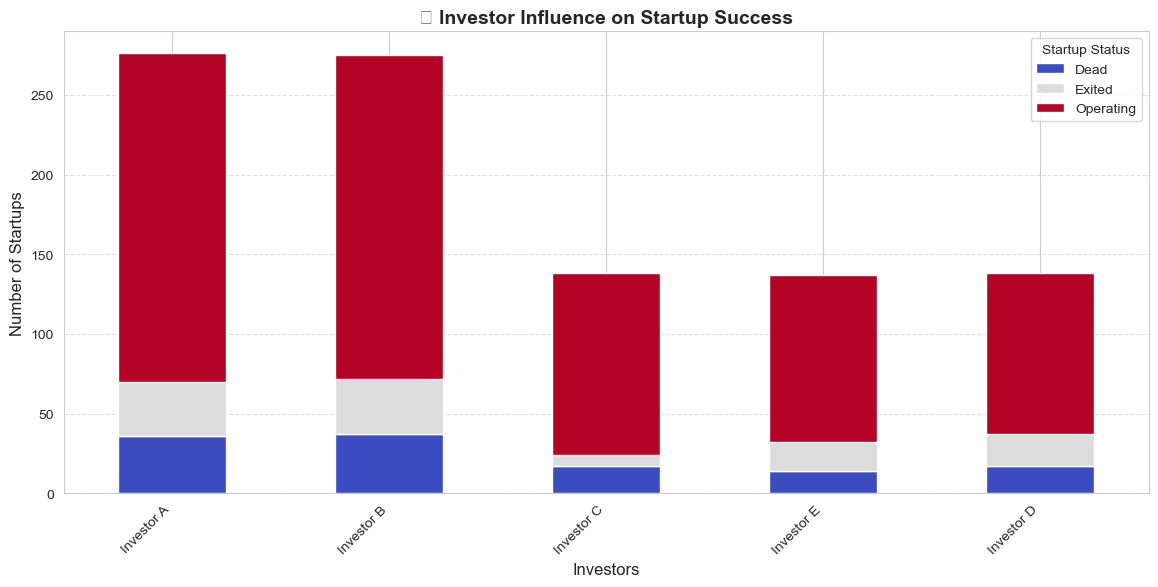

In [671]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Ensure 'status' column exists
if "Satus" in Startup_df.columns:
    Startup_df.rename(columns={"Satus": "status"}, inplace=True)

if "status" not in Startup_df.columns:
    raise KeyError("🚨 'status' column is missing! Ensure status is correctly defined.")

# ✅ Ensure 'Identified_Investors' column exists
if "Identified_Investors" not in Startup_df.columns:
    raise KeyError("🚨 'Identified_Investors' column is missing! Run NER extraction first!")

# ✅ Expand investors into separate rows
investor_exploded = Startup_df.explode("Identified_Investors")

# ✅ Count the number of startups per investor by status
investor_success = investor_exploded.groupby(["Identified_Investors", "status"])["Company"].count().unstack().fillna(0)

# ✅ Sort by most successful investors (Operating startups)
investor_success = investor_success.sort_values(by="Operating", ascending=False).head(15)  # Show top 15 investors

# ✅ Plot the Bar Chart
plt.figure(figsize=(12, 6))
investor_success.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(14, 6))

# ✅ Chart Formatting
plt.title("💰 Investor Influence on Startup Success", fontsize=14, fontweight='bold')
plt.xlabel("Investors", fontsize=12)
plt.ylabel("Number of Startups", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Startup Status", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# ✅ Show the Plot
plt.show()
